### overfit and underfit
- https://www.tensorflow.org/tutorials/keras/overfit_and_underfit
- 1번째

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

!pip install tf-nightly-2.0-preview
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

     |████████████████████████████████| 95.2MB 102kB/s 
     |████████████████████████████████| 3.8MB 47.9MB/s 
     |████████████████████████████████| 450kB 59.6MB/s 
     |████████████████████████████████| 81kB 11.8MB/s 
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.8.2 which is incompatible.
ERROR: tb-nightly 2.1.0a20191206 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2


2.0.0-dev20191002


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


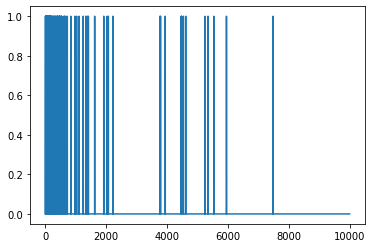

In [3]:
plt.plot(train_data[0])

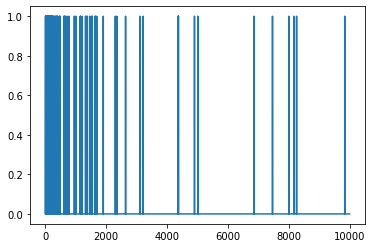

In [4]:
plt.plot(train_data[1])

In [5]:
baseline_model = keras.Sequential([
                                   keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS, )),
                                   keras.layers.Dense(16, activation='relu'),
                                   keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data, train_labels,
                                      epochs=20, batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.4540 - accuracy: 0.8105 - binary_crossentropy: 0.4540 - val_loss: 0.3153 - val_accuracy: 0.8778 - val_binary_crossentropy: 0.3153
Epoch 2/20
25000/25000 - 4s - loss: 0.2322 - accuracy: 0.9174 - binary_crossentropy: 0.2322 - val_loss: 0.2823 - val_accuracy: 0.8876 - val_binary_crossentropy: 0.2823
Epoch 3/20
25000/25000 - 4s - loss: 0.1717 - accuracy: 0.9399 - binary_crossentropy: 0.1717 - val_loss: 0.2950 - val_accuracy: 0.8834 - val_binary_crossentropy: 0.2950
Epoch 4/20
25000/25000 - 4s - loss: 0.1362 - accuracy: 0.9541 - binary_crossentropy: 0.1362 - val_loss: 0.3220 - val_accuracy: 0.8768 - val_binary_crossentropy: 0.3220
Epoch 5/20
25000/25000 - 4s - loss: 0.1098 - accuracy: 0.9640 - binary_crossentropy: 0.1098 - val_loss: 0.3685 - val_accuracy: 0.8689 - val_binary_crossentropy: 0.3685
Epoch 6/20
25000/25000 - 4s - loss: 0.0884 - accuracy: 0.9730 - binary_crossentropy: 0.0884 - val_loss: 0.3951

In [7]:
smaller_model = keras.Sequential([
                                  keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
                                  keras.layers.Dense(4, activation='relu'),
                                  keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam', loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data, train_labels, epochs=20,
                                    batch_size=512, validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5744 - accuracy: 0.7588 - binary_crossentropy: 0.5744 - val_loss: 0.4552 - val_accuracy: 0.8537 - val_binary_crossentropy: 0.4552
Epoch 2/20
25000/25000 - 3s - loss: 0.3654 - accuracy: 0.8845 - binary_crossentropy: 0.3654 - val_loss: 0.3479 - val_accuracy: 0.8791 - val_binary_crossentropy: 0.3479
Epoch 3/20
25000/25000 - 3s - loss: 0.2758 - accuracy: 0.9110 - binary_crossentropy: 0.2758 - val_loss: 0.3058 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.3058
Epoch 4/20
25000/25000 - 3s - loss: 0.2275 - accuracy: 0.9244 - binary_crossentropy: 0.2275 - val_loss: 0.2882 - val_accuracy: 0.8898 - val_binary_crossentropy: 0.2882
Epoch 5/20
25000/25000 - 3s - loss: 0.1966 - accuracy: 0.9336 - binary_crossentropy: 0.1966 - val_loss: 0.2834 - val_accuracy: 0.8879 - val_binary_crossentropy: 0.2834
Epoch 6/20
25000/25000 - 3s - loss: 0.1739 - accuracy: 0.9418 - binary_crossentropy: 0.1739 - val_loss: 0.2846

In [9]:
bigger_model = keras.models.Sequential([
                                        keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
                                        keras.layers.Dense(512, activation='relu'),
                                        keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 13s - loss: 0.3610 - accuracy: 0.8363 - binary_crossentropy: 0.3610 - val_loss: 0.3003 - val_accuracy: 0.8773 - val_binary_crossentropy: 0.3003
Epoch 2/20
25000/25000 - 13s - loss: 0.1350 - accuracy: 0.9498 - binary_crossentropy: 0.1350 - val_loss: 0.3226 - val_accuracy: 0.8778 - val_binary_crossentropy: 0.3226
Epoch 3/20
25000/25000 - 13s - loss: 0.0362 - accuracy: 0.9900 - binary_crossentropy: 0.0362 - val_loss: 0.4417 - val_accuracy: 0.8704 - val_binary_crossentropy: 0.4417
Epoch 4/20
25000/25000 - 13s - loss: 0.0049 - accuracy: 0.9993 - binary_crossentropy: 0.0049 - val_loss: 0.6010 - val_accuracy: 0.8727 - val_binary_crossentropy: 0.6010
Epoch 5/20
25000/25000 - 13s - loss: 0.0015 - accuracy: 0.9999 - binary_crossentropy: 0.0015 - val_loss: 0.6547 - val_accuracy: 0.8718 - val_binary_crossentropy: 0.6547
Epoch 6/20
25000/25000 - 13s - loss: 2.2062e-04 - accuracy: 1.0000 - binary_crossentropy: 2.2062e-04 - va

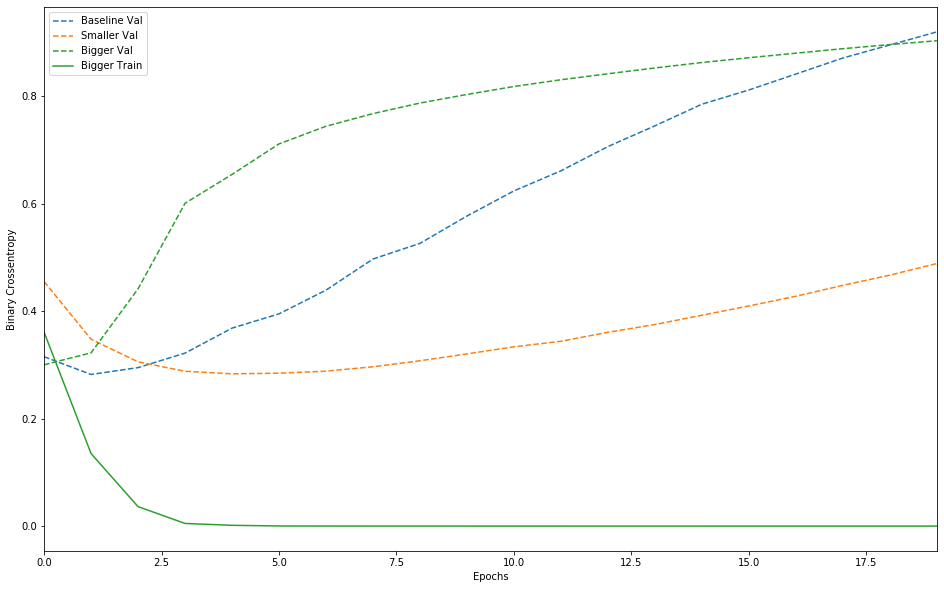

In [11]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

- L1 규제는 가중치의 절댓값에 비례하는 비용이 추가됩니다(즉, 가중치의 "L1 노름(norm)"을 추가합니다).
- L2 규제는 가중치의 제곱에 비례하는 비용이 추가됩니다(즉, 가중치의 "L2 노름"의 제곱을 추가합니다). 신경망에서는 L2 규제를 가중치 감쇠(weight decay)라고도 부릅니다. 이름이 다르지만 혼돈하지 마세요. 가중치 감쇠는 수학적으로 L2 규제와 동일

In [0]:
l2_model = keras.models.Sequential([
                                    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                                                       activation='relu', input_shape=(NUM_WORDS, )),
                                    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                                                       activation='relu'),
                                    keras.layers.Dense(1, activation='sigmoid')                                    
])

In [13]:
l2_model.compile(optimizer='adam', loss='binary_crossentropy', 
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5414 - accuracy: 0.8020 - binary_crossentropy: 0.5022 - val_loss: 0.3917 - val_accuracy: 0.8726 - val_binary_crossentropy: 0.3521
Epoch 2/20
25000/25000 - 3s - loss: 0.3124 - accuracy: 0.9032 - binary_crossentropy: 0.2687 - val_loss: 0.3335 - val_accuracy: 0.8885 - val_binary_crossentropy: 0.2866
Epoch 3/20
25000/25000 - 3s - loss: 0.2563 - accuracy: 0.9283 - binary_crossentropy: 0.2066 - val_loss: 0.3338 - val_accuracy: 0.8873 - val_binary_crossentropy: 0.2821
Epoch 4/20
25000/25000 - 4s - loss: 0.2308 - accuracy: 0.9394 - binary_crossentropy: 0.1772 - val_loss: 0.3439 - val_accuracy: 0.8840 - val_binary_crossentropy: 0.2893
Epoch 5/20
25000/25000 - 4s - loss: 0.2149 - accuracy: 0.9454 - binary_crossentropy: 0.1591 - val_loss: 0.3564 - val_accuracy: 0.8806 - val_binary_crossentropy: 0.2995
Epoch 6/20
25000/25000 - 4s - loss: 0.2029 - accuracy: 0.9498 - binary_crossentropy: 0.1449 - val_loss: 0.3718

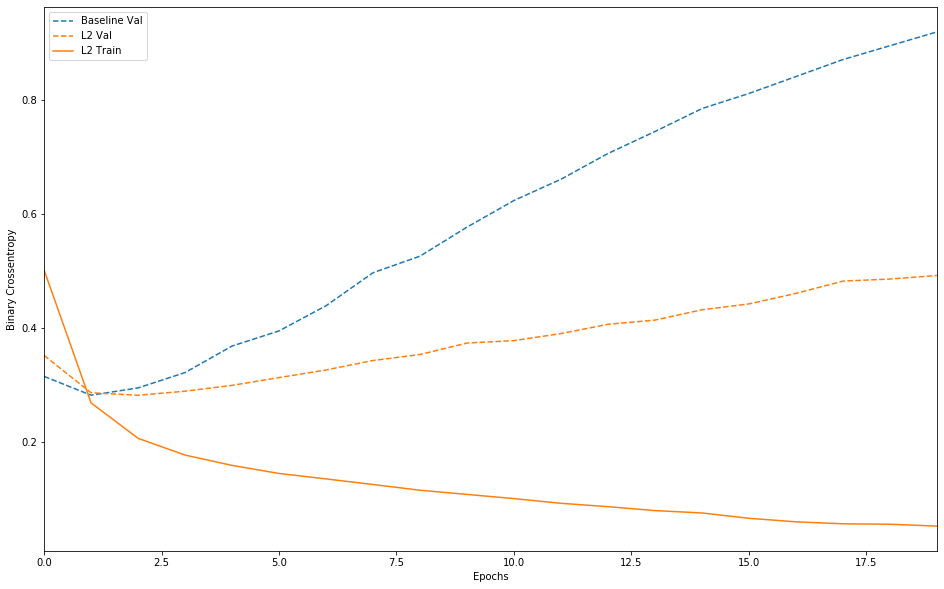

In [14]:
plot_history([('baseline', baseline_history), 
              ('l2', l2_model_history)])

In [15]:
dpt_model = keras.models.Sequential([
                                     keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
                                     keras.layers.Dropout(0.5),
                                     keras.layers.Dense(16, activation='relu'),
                                     keras.layers.Dropout(0.5),
                                     keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6338 - accuracy: 0.6334 - binary_crossentropy: 0.6338 - val_loss: 0.5032 - val_accuracy: 0.8335 - val_binary_crossentropy: 0.5032
Epoch 2/20
25000/25000 - 3s - loss: 0.4575 - accuracy: 0.8030 - binary_crossentropy: 0.4575 - val_loss: 0.3353 - val_accuracy: 0.8814 - val_binary_crossentropy: 0.3353
Epoch 3/20
25000/25000 - 4s - loss: 0.3455 - accuracy: 0.8689 - binary_crossentropy: 0.3455 - val_loss: 0.2892 - val_accuracy: 0.8877 - val_binary_crossentropy: 0.2892
Epoch 4/20
25000/25000 - 3s - loss: 0.2792 - accuracy: 0.9008 - binary_crossentropy: 0.2792 - val_loss: 0.2718 - val_accuracy: 0.8919 - val_binary_crossentropy: 0.2718
Epoch 5/20
25000/25000 - 3s - loss: 0.2397 - accuracy: 0.9166 - binary_crossentropy: 0.2397 - val_loss: 0.2796 - val_accuracy: 0.8896 - val_binary_crossentropy: 0.2796
Epoch 6/20
25000/25000 - 3s - loss: 0.2036 - accuracy: 0.9295 - binary_crossentropy: 0.2036 - val_loss: 0.2904

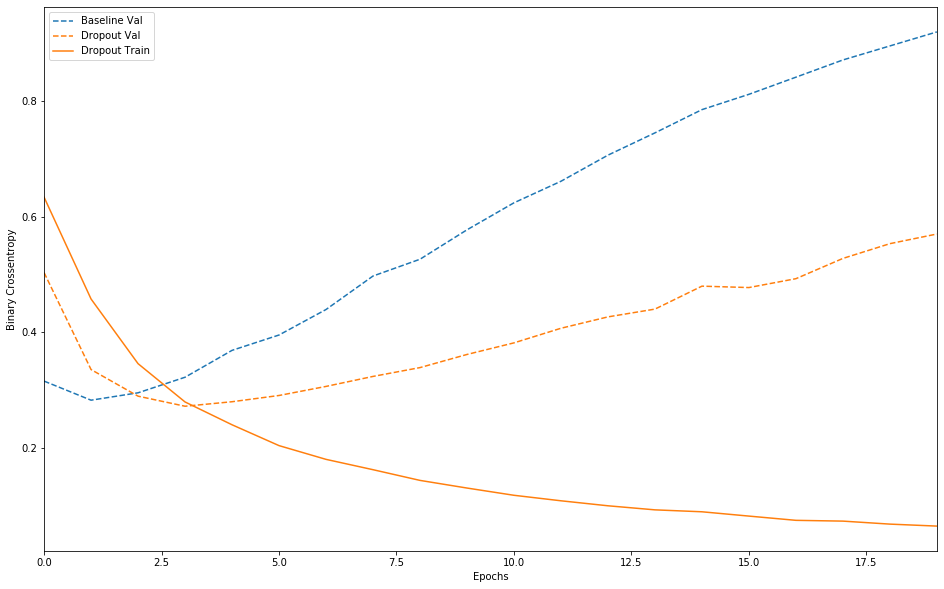

In [16]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

In [0]:
# 2번째
# l2 model과 dropout만 진행

In [0]:
l2_model = keras.models.Sequential([
                                    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                                                       activation='relu', input_shape=(NUM_WORDS, )),
                                    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                                                       activation='relu'),
                                    keras.layers.Dense(1, activation='sigmoid')                                    
])

In [0]:
l2_model.compile(optimizer='adam', loss='binary_crossentropy', 
                 metrics=['accuracy', 'binary_crossentropy'])

In [21]:
l2_model_history = l2_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5364 - accuracy: 0.8064 - binary_crossentropy: 0.4970 - val_loss: 0.3868 - val_accuracy: 0.8745 - val_binary_crossentropy: 0.3453
Epoch 2/20
25000/25000 - 4s - loss: 0.3110 - accuracy: 0.9066 - binary_crossentropy: 0.2651 - val_loss: 0.3374 - val_accuracy: 0.8868 - val_binary_crossentropy: 0.2883
Epoch 3/20
25000/25000 - 3s - loss: 0.2576 - accuracy: 0.9274 - binary_crossentropy: 0.2061 - val_loss: 0.3405 - val_accuracy: 0.8846 - val_binary_crossentropy: 0.2872
Epoch 4/20
25000/25000 - 4s - loss: 0.2342 - accuracy: 0.9386 - binary_crossentropy: 0.1793 - val_loss: 0.3458 - val_accuracy: 0.8838 - val_binary_crossentropy: 0.2897
Epoch 5/20
25000/25000 - 4s - loss: 0.2167 - accuracy: 0.9474 - binary_crossentropy: 0.1592 - val_loss: 0.3577 - val_accuracy: 0.8802 - val_binary_crossentropy: 0.2994
Epoch 6/20
25000/25000 - 4s - loss: 0.2055 - accuracy: 0.9514 - binary_crossentropy: 0.1464 - val_loss: 0.3746

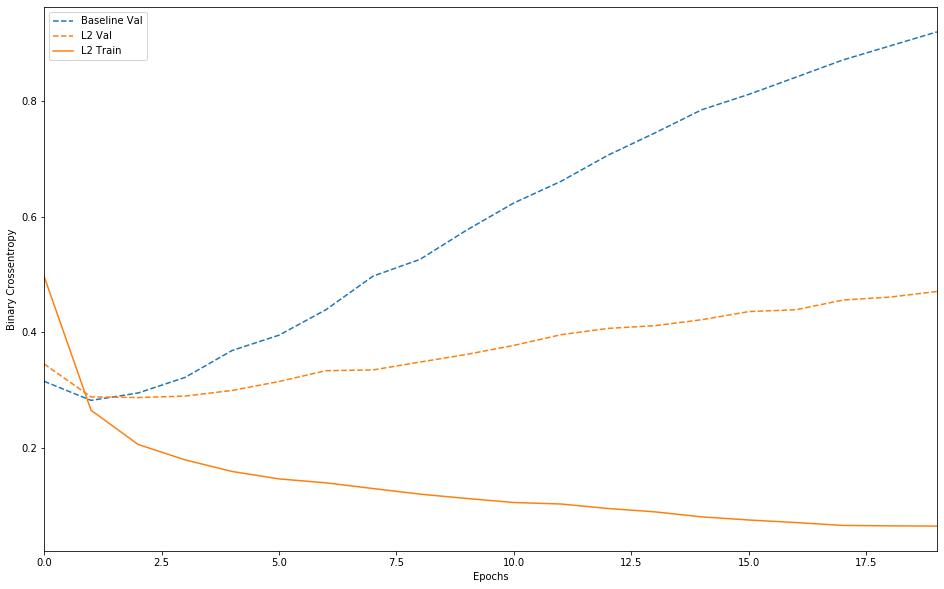

In [22]:
plot_history([('baseline', baseline_history), 
              ('l2', l2_model_history)])

In [0]:
dpt_model = keras.models.Sequential([
                                     keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
                                     keras.layers.Dropout(0.5),
                                     keras.layers.Dense(16, activation='relu'),
                                     keras.layers.Dropout(0.5),
                                     keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

In [25]:
dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6056 - accuracy: 0.6638 - binary_crossentropy: 0.6056 - val_loss: 0.4472 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.4472
Epoch 2/20
25000/25000 - 4s - loss: 0.4323 - accuracy: 0.8219 - binary_crossentropy: 0.4323 - val_loss: 0.3311 - val_accuracy: 0.8850 - val_binary_crossentropy: 0.3311
Epoch 3/20
25000/25000 - 3s - loss: 0.3415 - accuracy: 0.8672 - binary_crossentropy: 0.3415 - val_loss: 0.2865 - val_accuracy: 0.8884 - val_binary_crossentropy: 0.2865
Epoch 4/20
25000/25000 - 4s - loss: 0.2885 - accuracy: 0.8932 - binary_crossentropy: 0.2885 - val_loss: 0.2767 - val_accuracy: 0.8895 - val_binary_crossentropy: 0.2767
Epoch 5/20
25000/25000 - 4s - loss: 0.2502 - accuracy: 0.9108 - binary_crossentropy: 0.2502 - val_loss: 0.2755 - val_accuracy: 0.8889 - val_binary_crossentropy: 0.2755
Epoch 6/20
25000/25000 - 3s - loss: 0.2154 - accuracy: 0.9250 - binary_crossentropy: 0.2154 - val_loss: 0.2885

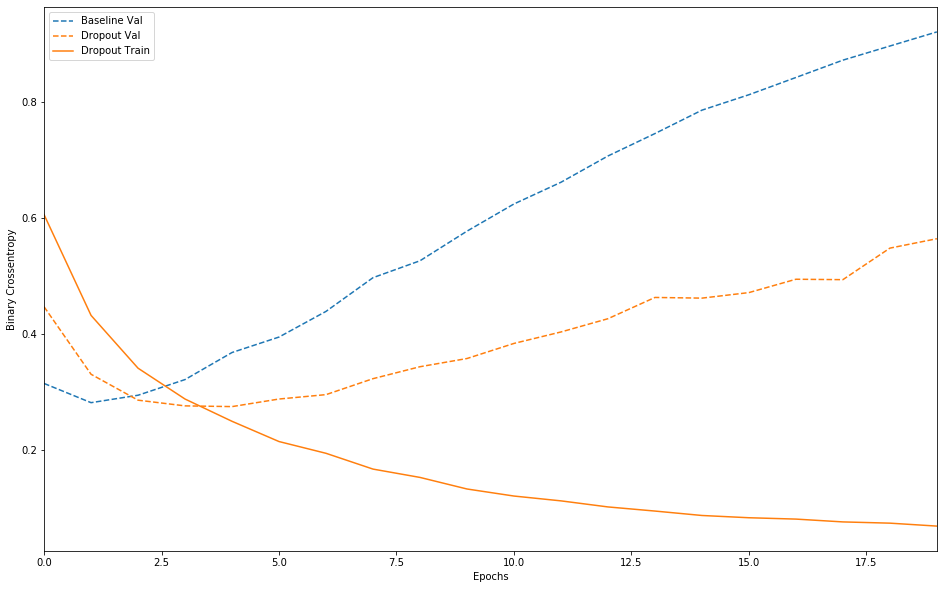

In [26]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

In [0]:
# 3번째

In [0]:
l2_model = keras.models.Sequential([
                                    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                                                       activation='relu', input_shape=(NUM_WORDS, )),
                                    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                                                       activation='relu'),
                                    keras.layers.Dense(1, activation='sigmoid')                                    
])

In [0]:
l2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

In [30]:
l2_model_history = l2_model.fit(train_data, train_labels, epochs=10, batch_size=512, validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 - 4s - loss: 0.5520 - accuracy: 0.7998 - binary_crossentropy: 0.5143 - val_loss: 0.3934 - val_accuracy: 0.8704 - val_binary_crossentropy: 0.3538
Epoch 2/10
25000/25000 - 4s - loss: 0.3107 - accuracy: 0.9071 - binary_crossentropy: 0.2657 - val_loss: 0.3374 - val_accuracy: 0.8868 - val_binary_crossentropy: 0.2885
Epoch 3/10
25000/25000 - 4s - loss: 0.2539 - accuracy: 0.9294 - binary_crossentropy: 0.2022 - val_loss: 0.3399 - val_accuracy: 0.8859 - val_binary_crossentropy: 0.2862
Epoch 4/10
25000/25000 - 3s - loss: 0.2277 - accuracy: 0.9412 - binary_crossentropy: 0.1721 - val_loss: 0.3513 - val_accuracy: 0.8820 - val_binary_crossentropy: 0.2945
Epoch 5/10
25000/25000 - 4s - loss: 0.2125 - accuracy: 0.9481 - binary_crossentropy: 0.1542 - val_loss: 0.3669 - val_accuracy: 0.8782 - val_binary_crossentropy: 0.3078
Epoch 6/10
25000/25000 - 4s - loss: 0.2012 - accuracy: 0.9528 - binary_crossentropy: 0.1409 - val_loss: 0.3841

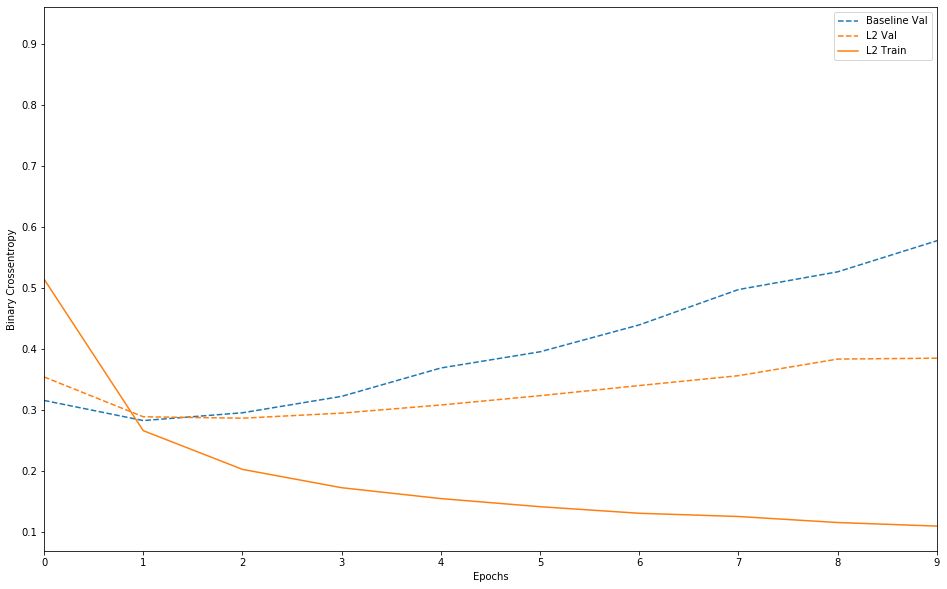

In [31]:
plot_history([('baseline', baseline_history), 
              ('l2', l2_model_history)])

In [0]:
dpt_model = keras.models.Sequential([
                                     keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
                                     keras.layers.Dropout(0.5),
                                     keras.layers.Dense(16, activation='relu'),
                                     keras.layers.Dropout(0.5),
                                     keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

In [34]:
dpt_model_history = dpt_model.fit(train_data, train_labels, epochs=10, batch_size=512,
                                  validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 - 4s - loss: 0.6272 - accuracy: 0.6327 - binary_crossentropy: 0.6272 - val_loss: 0.4782 - val_accuracy: 0.8517 - val_binary_crossentropy: 0.4782
Epoch 2/10
25000/25000 - 4s - loss: 0.4561 - accuracy: 0.7984 - binary_crossentropy: 0.4561 - val_loss: 0.3399 - val_accuracy: 0.8756 - val_binary_crossentropy: 0.3399
Epoch 3/10
25000/25000 - 3s - loss: 0.3563 - accuracy: 0.8553 - binary_crossentropy: 0.3563 - val_loss: 0.2892 - val_accuracy: 0.8872 - val_binary_crossentropy: 0.2892
Epoch 4/10
25000/25000 - 3s - loss: 0.3021 - accuracy: 0.8822 - binary_crossentropy: 0.3021 - val_loss: 0.2747 - val_accuracy: 0.8879 - val_binary_crossentropy: 0.2747
Epoch 5/10
25000/25000 - 3s - loss: 0.2597 - accuracy: 0.9018 - binary_crossentropy: 0.2597 - val_loss: 0.2780 - val_accuracy: 0.8852 - val_binary_crossentropy: 0.2780
Epoch 6/10
25000/25000 - 3s - loss: 0.2331 - accuracy: 0.9151 - binary_crossentropy: 0.2331 - val_loss: 0.2850

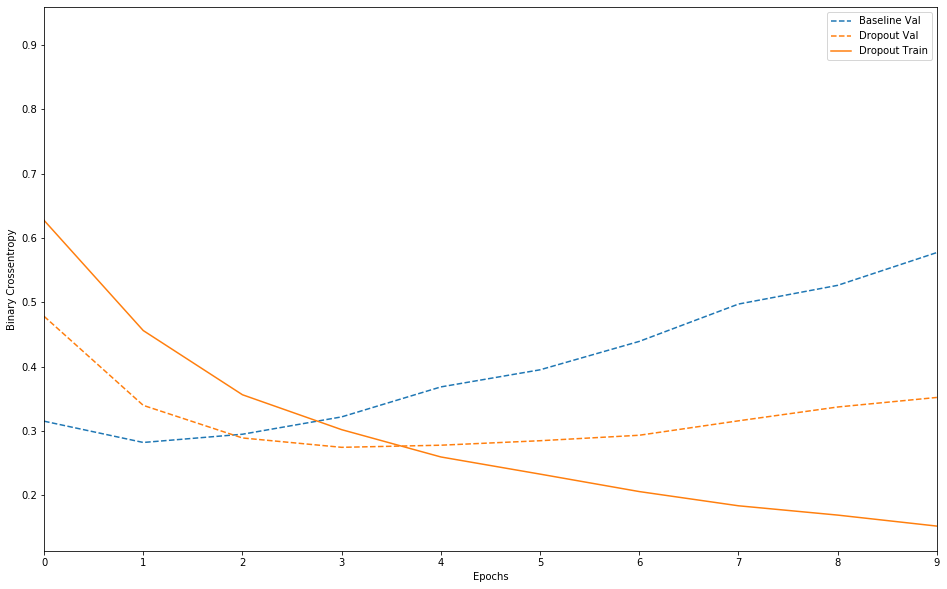

In [35]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

In [0]:
# 4번째

In [0]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape=(NUM_WORDS, )),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')                                    
])

In [0]:
l2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

In [39]:
l2_model_history = l2_model.fit(train_data, train_labels, epochs=10, batch_size=512, validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 - 4s - loss: 0.5431 - accuracy: 0.8166 - binary_crossentropy: 0.5023 - val_loss: 0.4046 - val_accuracy: 0.8724 - val_binary_crossentropy: 0.3616
Epoch 2/10
25000/25000 - 3s - loss: 0.3225 - accuracy: 0.9032 - binary_crossentropy: 0.2746 - val_loss: 0.3391 - val_accuracy: 0.8879 - val_binary_crossentropy: 0.2878
Epoch 3/10
25000/25000 - 4s - loss: 0.2651 - accuracy: 0.9258 - binary_crossentropy: 0.2115 - val_loss: 0.3470 - val_accuracy: 0.8807 - val_binary_crossentropy: 0.2919
Epoch 4/10
25000/25000 - 4s - loss: 0.2402 - accuracy: 0.9361 - binary_crossentropy: 0.1835 - val_loss: 0.3454 - val_accuracy: 0.8838 - val_binary_crossentropy: 0.2876
Epoch 5/10
25000/25000 - 4s - loss: 0.2233 - accuracy: 0.9438 - binary_crossentropy: 0.1647 - val_loss: 0.3621 - val_accuracy: 0.8788 - val_binary_crossentropy: 0.3028
Epoch 6/10
25000/25000 - 4s - loss: 0.2118 - accuracy: 0.9492 - binary_crossentropy: 0.1516 - val_loss: 0.3677

In [0]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

In [42]:
dpt_model_history = dpt_model.fit(train_data, train_labels, epochs=10, batch_size=512,
                                  validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 - 4s - loss: 0.6355 - accuracy: 0.6156 - binary_crossentropy: 0.6355 - val_loss: 0.5066 - val_accuracy: 0.8582 - val_binary_crossentropy: 0.5066
Epoch 2/10
25000/25000 - 4s - loss: 0.4764 - accuracy: 0.7915 - binary_crossentropy: 0.4764 - val_loss: 0.3553 - val_accuracy: 0.8779 - val_binary_crossentropy: 0.3553
Epoch 3/10
25000/25000 - 3s - loss: 0.3648 - accuracy: 0.8624 - binary_crossentropy: 0.3648 - val_loss: 0.2886 - val_accuracy: 0.8875 - val_binary_crossentropy: 0.2886
Epoch 4/10
25000/25000 - 4s - loss: 0.2977 - accuracy: 0.8972 - binary_crossentropy: 0.2977 - val_loss: 0.2740 - val_accuracy: 0.8884 - val_binary_crossentropy: 0.2740
Epoch 5/10
25000/25000 - 4s - loss: 0.2489 - accuracy: 0.9155 - binary_crossentropy: 0.2489 - val_loss: 0.2754 - val_accuracy: 0.8867 - val_binary_crossentropy: 0.2754
Epoch 6/10
25000/25000 - 4s - loss: 0.2133 - accuracy: 0.9262 - binary_crossentropy: 0.2133 - val_loss: 0.2868

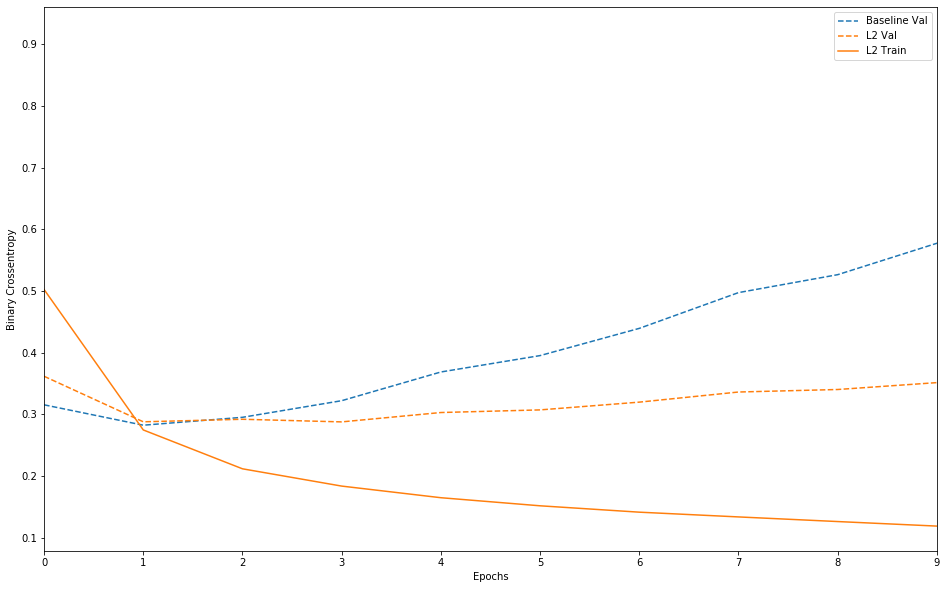

In [43]:
plot_history([('baseline', baseline_history), 
              ('l2', l2_model_history)])

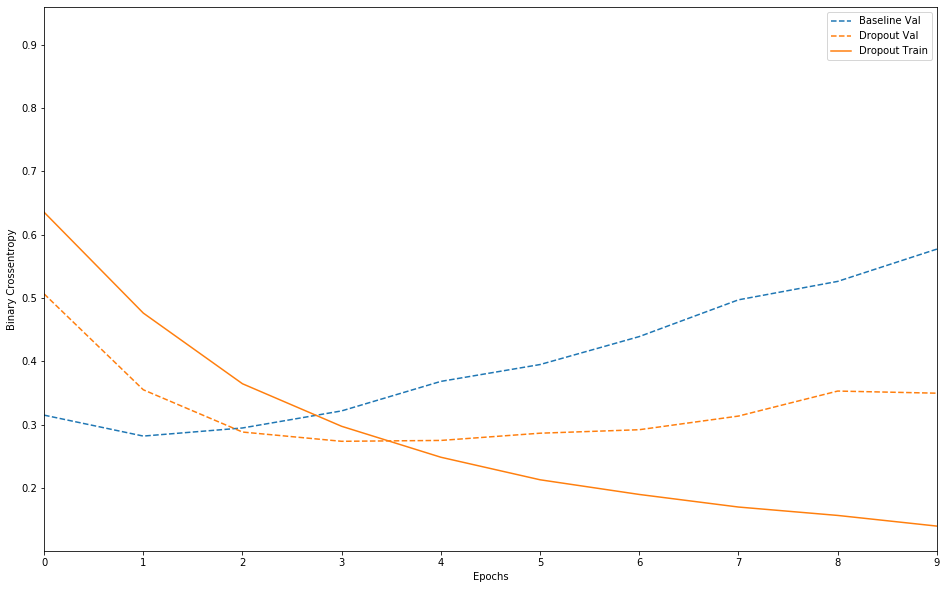

In [44]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

### Load CSV data
- tf.data.Dataset에서 csv 로딩

In [0]:
# 1번째

In [46]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import numpy as np
import tensorflow as tf

In [48]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

16384/13049 [=====================================] - 0s 0us/step


In [0]:
np.set_printoptions(precision=3, suppress=True)

In [50]:
!head {train_file_path}

survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.25,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
1,female,26.0,0,0,7.925,Third,unknown,Southampton,y
1,female,35.0,1,0,53.1,First,C,Southampton,n
0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
0,male,2.0,3,1,21.075,Third,unknown,Southampton,n
1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n
1,female,4.0,1,1,16.7,Third,G,Southampton,n


In [0]:
LABEL_COLUMN = 'survived'
LABELS = [0, 1]

In [52]:
def get_dataset(file_path, **kwargs):
    dataset = tf.data.experimental.make_csv_dataset(
        file_path,
        batch_size=5, 
        label_name=LABEL_COLUMN,
        na_value="?",
        num_epochs=1,
        ignore_errors=True, 
        **kwargs)
    return dataset

raw_train_data = get_dataset(train_file_path)
raw_test_data = get_dataset(test_file_path)

Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.


In [0]:
def show_batch(dataset):
    for batch, label in dataset.take(1):
        for key, value in batch.items():
            print("{:20s}: {}".format(key,value.numpy()))

In [54]:
show_batch(raw_train_data)

sex                 : [b'female' b'male' b'male' b'male' b'male']
age                 : [50.  3. 28. 35. 22.]
n_siblings_spouses  : [0 1 0 0 0]
parch               : [1 1 0 0 0]
fare                : [ 26.     18.75   56.496 512.329   7.125]
class               : [b'Second' b'Second' b'Third' b'First' b'Third']
deck                : [b'unknown' b'unknown' b'unknown' b'B' b'unknown']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Cherbourg' b'Southampton']
alone               : [b'n' b'n' b'y' b'y' b'y']


In [55]:
CSV_COLUMNS = ['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

temp_dataset = get_dataset(train_file_path, column_names=CSV_COLUMNS)

show_batch(temp_dataset)

sex                 : [b'female' b'male' b'male' b'male' b'male']
age                 : [28. 20. 45. 28. 30.]
n_siblings_spouses  : [0 1 1 0 0]
parch               : [0 1 0 1 0]
fare                : [12.35  15.742 83.475 33.     7.896]
class               : [b'Second' b'Third' b'First' b'Second' b'Third']
deck                : [b'E' b'unknown' b'C' b'unknown' b'unknown']
embark_town         : [b'Queenstown' b'Cherbourg' b'Southampton' b'Southampton' b'Southampton']
alone               : [b'y' b'n' b'n' b'n' b'y']


In [56]:
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'class', 'deck', 'alone']

temp_dataset = get_dataset(train_file_path, select_columns=SELECT_COLUMNS)

show_batch(temp_dataset)

age                 : [17. 16. 32. 28. 28.]
n_siblings_spouses  : [1 0 0 0 1]
class               : [b'First' b'Third' b'Third' b'Second' b'First']
deck                : [b'B' b'unknown' b'unknown' b'unknown' b'C']
alone               : [b'n' b'y' b'y' b'y' b'n']


In [57]:
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'parch', 'fare']
DEFAULTS = [0, 0.0, 0.0, 0.0, 0.0]
temp_dataset = get_dataset(train_file_path, select_columns=SELECT_COLUMNS, column_defaults = DEFAULTS)

show_batch(temp_dataset)

age                 : [22. 22. 24. 16. 28.]
n_siblings_spouses  : [0. 0. 0. 0. 0.]
parch               : [0. 0. 0. 0. 0.]
fare                : [ 7.75   7.796 13.     7.75   7.854]


In [0]:
example_batch, labels_batch = next(iter(temp_dataset)) 

In [0]:
def pack(features, label):
    return tf.stack(list(features.values()), axis=-1), label

In [60]:
packed_dataset = temp_dataset.map(pack)

for features, labels in packed_dataset.take(1):
    print(features.numpy())
    print()
    print(labels.numpy())

[[28.     1.     0.    24.15 ]
 [16.     0.     0.     8.05 ]
 [40.     1.     0.     9.475]
 [38.     0.     0.    13.   ]
 [19.     0.     0.    10.5  ]]

[1 0 0 0 0]


In [61]:
show_batch(raw_train_data)

sex                 : [b'male' b'male' b'female' b'male' b'female']
age                 : [25. 16. 29. 26. 42.]
n_siblings_spouses  : [0 1 1 0 1]
parch               : [0 3 0 0 0]
fare                : [ 7.05  34.375 26.     7.896 26.   ]
class               : [b'Third' b'Third' b'Second' b'Third' b'Second']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'unknown']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Southampton'
 b'Southampton']
alone               : [b'y' b'n' b'n' b'y' b'n']


In [0]:
example_batch, labels_batch = next(iter(temp_dataset)) 

In [0]:
class PackNumericFeatures(object):
    def __init__(self, names):
        self.names = names

    def __call__(self, features, labels):
        numeric_features = [features.pop(name) for name in self.names]
        numeric_features = [tf.cast(feat, tf.float32) for feat in numeric_features]
        numeric_features = tf.stack(numeric_features, axis=-1)
        features['numeric'] = numeric_features

        return features, labels

In [0]:
NUMERIC_FEATURES = ['age','n_siblings_spouses','parch', 'fare']

packed_train_data = raw_train_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))

packed_test_data = raw_test_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))

In [65]:
show_batch(packed_train_data)

sex                 : [b'male' b'female' b'female' b'female' b'male']
class               : [b'Third' b'Third' b'Second' b'First' b'First']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'A']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Cherbourg' b'Cherbourg']
alone               : [b'y' b'n' b'n' b'y' b'y']
numeric             : [[ 28.      0.      0.     56.496]
 [ 28.      1.      2.     23.45 ]
 [ 34.      0.      1.     23.   ]
 [ 42.      0.      0.    227.525]
 [ 71.      0.      0.     34.654]]


In [0]:
example_batch, labels_batch = next(iter(packed_train_data)) 

In [67]:
import pandas as pd
desc = pd.read_csv(train_file_path)[NUMERIC_FEATURES].describe()
desc

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [0]:
MEAN = np.array(desc.T['mean'])
STD = np.array(desc.T['std'])

In [0]:
def normalize_numeric_data(data, mean, std):
    return (data-mean)/std

In [70]:
normalizer = functools.partial(normalize_numeric_data, mean=MEAN, std=STD)

numeric_column = tf.feature_column.numeric_column('numeric', normalizer_fn=normalizer, shape=[len(NUMERIC_FEATURES)])
numeric_columns = [numeric_column]
numeric_column

NumericColumn(key='numeric', shape=(4,), default_value=None, dtype=tf.float32, normalizer_fn=functools.partial(<function normalize_numeric_data at 0x7f730a431d90>, mean=array([29.631,  0.545,  0.38 , 34.385]), std=array([12.512,  1.151,  0.793, 54.598])))

In [71]:
example_batch['numeric']

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[ 28.   ,   1.   ,   0.   , 146.521],
       [ 22.   ,   1.   ,   0.   ,   7.25 ],
       [ 47.   ,   0.   ,   0.   ,   7.25 ],
       [ 41.   ,   0.   ,   1.   ,  19.5  ],
       [ 22.   ,   0.   ,   0.   ,   9.   ]], dtype=float32)>

In [72]:
numeric_layer = tf.keras.layers.DenseFeatures(numeric_columns)
numeric_layer(example_batch).numpy()

array([[-0.13 ,  0.395, -0.479,  2.054],
       [-0.61 ,  0.395, -0.479, -0.497],
       [ 1.388, -0.474, -0.479, -0.497],
       [ 0.909, -0.474,  0.782, -0.273],
       [-0.61 , -0.474, -0.479, -0.465]], dtype=float32)

In [0]:
CATEGORIES = {
    'sex': ['male', 'female'],
    'class' : ['First', 'Second', 'Third'],
    'deck' : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'embark_town' : ['Cherbourg', 'Southhampton', 'Queenstown'],
    'alone' : ['y', 'n']
}

In [0]:
categorical_columns = []
for feature, vocab in CATEGORIES.items():
    cat_col = tf.feature_column.categorical_column_with_vocabulary_list(
        key=feature, vocabulary_list=vocab)
    categorical_columns.append(tf.feature_column.indicator_column(cat_col))

In [75]:
categorical_columns

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('First', 'Second', 'Third'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='deck', vocabulary_list=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Cherbourg', 'Southhampton', 'Queenstown'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='alone', vocabulary_list=('y', 'n'), dtype=tf.string, default_value=-1, num_oov_buckets=0))]

In [76]:
categorical_layer = tf.keras.layers.DenseFeatures(categorical_columns)
print(categorical_layer(example_batch).numpy()[0])

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
[0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]


In [0]:
preprocessing_layer = tf.keras.layers.DenseFeatures(categorical_columns+numeric_columns)

In [78]:
print(preprocessing_layer(example_batch).numpy()[0])

[ 0.     1.     1.     0.     0.     0.     1.     0.     0.     0.
  0.     0.     0.     0.     0.     1.     0.     0.    -0.13   0.395
 -0.479  2.054  0.     1.   ]


In [0]:
model = tf.keras.Sequential([
                             preprocessing_layer,
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [0]:
train_data = packed_train_data.shuffle(500)
test_data = packed_test_data

In [81]:
model.fit(train_data, epochs=20)

Epoch 1/20
126/126 [==============================] - 1s 9ms/step - loss: 0.4921 - accuracy: 0.7831
Epoch 2/20
126/126 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8134
Epoch 3/20
126/126 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8309
Epoch 4/20
126/126 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8293
Epoch 5/20
126/126 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.8453
Epoch 6/20
126/126 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8389
Epoch 7/20
126/126 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8309
Epoch 8/20
126/126 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8501
Epoch 9/20
126/126 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8581
Epoch 10/20
126/126 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8533

In [82]:
test_loss, test_accuracy = model.evaluate(test_data)

print('\n\nTest Loss {}, Test Accuracy {}'.format(test_loss, test_accuracy))

     53/Unknown - 0s 7ms/step - loss: 0.4458 - accuracy: 0.8485

Test Loss 0.4458179369147094, Test Accuracy 0.8484848737716675


In [83]:
predictions = model.predict(test_data)

for prediction, survived in zip(predictions[:10], list(test_data)[0][1][:10]):
  print("Predicted survival: {:.2%}".format(prediction[0]),
        " | Actual outcome: ",
        ("SURVIVED" if bool(survived) else "DIED"))

Predicted survival: 9.78%  | Actual outcome:  DIED
Predicted survival: 5.86%  | Actual outcome:  SURVIVED
Predicted survival: 99.27%  | Actual outcome:  SURVIVED
Predicted survival: 22.66%  | Actual outcome:  SURVIVED
Predicted survival: 99.98%  | Actual outcome:  DIED


In [0]:
# 2번째

In [0]:
NUMERIC_FEATURES = ['age','n_siblings_spouses','parch', 'fare']

packed_train_data = raw_train_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))

packed_test_data = raw_test_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))

In [0]:
example_batch, labels_batch = next(iter(packed_train_data)) 

In [0]:
MEAN = np.array(desc.T['mean'])
STD = np.array(desc.T['std'])

In [0]:
normalizer = functools.partial(normalize_numeric_data, mean=MEAN, std=STD)

numeric_column = tf.feature_column.numeric_column('numeric', normalizer_fn=normalizer, shape=[len(NUMERIC_FEATURES)])
numeric_columns = [numeric_column]

In [89]:
numeric_layer = tf.keras.layers.DenseFeatures(numeric_columns)
numeric_layer(example_batch).numpy()

array([[ 1.548,  0.395, -0.479,  0.413],
       [-0.13 , -0.474, -0.479,  0.096],
       [ 0.429, -0.474, -0.479, -0.499],
       [ 0.109,  0.395,  0.782, -0.254],
       [-1.649,  2.132,  2.043, -0.119]], dtype=float32)

In [0]:
CATEGORIES = {
    'sex': ['male', 'female'],
    'class' : ['First', 'Second', 'Third'],
    'deck' : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'embark_town' : ['Cherbourg', 'Southhampton', 'Queenstown'],
    'alone' : ['y', 'n']
}

In [0]:
categorical_columns = []
for feature, vocab in CATEGORIES.items():
    cat_col = tf.feature_column.categorical_column_with_vocabulary_list(
        key=feature, vocabulary_list=vocab)
    categorical_columns.append(tf.feature_column.indicator_column(cat_col))

In [0]:
categorical_layer = tf.keras.layers.DenseFeatures(categorical_columns)

In [0]:
preprocessing_layer = tf.keras.layers.DenseFeatures(categorical_columns+numeric_columns)

In [0]:
model = tf.keras.Sequential([
                             preprocessing_layer,
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [0]:
train_data = packed_train_data.shuffle(500)
test_data = packed_test_data

In [96]:
model.fit(train_data, epochs=10)

Epoch 1/10
126/126 [==============================] - 1s 8ms/step - loss: 0.4929 - accuracy: 0.7640
Epoch 2/10
126/126 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8214
Epoch 3/10
126/126 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8166
Epoch 4/10
126/126 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8293
Epoch 5/10
126/126 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8357
Epoch 6/10
126/126 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8437
Epoch 7/10
126/126 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8405
Epoch 8/10
126/126 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8469
Epoch 9/10
126/126 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8565
Epoch 10/10
126/126 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8485

In [97]:
test_loss, test_accuracy = model.evaluate(test_data)

print('\n\nTest Loss {}, Test Accuracy {}'.format(test_loss, test_accuracy))

     53/Unknown - 0s 7ms/step - loss: 0.4184 - accuracy: 0.8409

Test Loss 0.41836196943274084, Test Accuracy 0.8409090638160706


In [0]:
# 3번째

In [0]:
NUMERIC_FEATURES = ['age','n_siblings_spouses','parch', 'fare']

packed_train_data = raw_train_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))

packed_test_data = raw_test_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))

In [0]:
MEAN = np.array(desc.T['mean'])
STD = np.array(desc.T['std'])

In [0]:
normalizer = functools.partial(normalize_numeric_data, mean=MEAN, std=STD)

numeric_column = tf.feature_column.numeric_column('numeric', normalizer_fn=normalizer, shape=[len(NUMERIC_FEATURES)])
numeric_columns = [numeric_column]

In [0]:
numeric_layer = tf.keras.layers.DenseFeatures(numeric_columns)

In [0]:
categorical_columns = []
for feature, vocab in CATEGORIES.items():
    cat_col = tf.feature_column.categorical_column_with_vocabulary_list(
        key=feature, vocabulary_list=vocab)
    categorical_columns.append(tf.feature_column.indicator_column(cat_col))

In [0]:
categorical_layer = tf.keras.layers.DenseFeatures(categorical_columns)

In [0]:
preprocessing_layer = tf.keras.layers.DenseFeatures(categorical_columns+numeric_columns)

In [0]:
model = tf.keras.Sequential([
                             preprocessing_layer,
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [0]:
train_data = packed_train_data.shuffle(500)
test_data = packed_test_data

In [108]:
model.fit(train_data, epochs=30)

Epoch 1/30
126/126 [==============================] - 1s 9ms/step - loss: 0.5022 - accuracy: 0.7719
Epoch 2/30
126/126 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8054
Epoch 3/30
126/126 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8230
Epoch 4/30
126/126 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8341
Epoch 5/30
126/126 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8357
Epoch 6/30
126/126 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.8357
Epoch 7/30
126/126 [==============================] - 0s 2ms/step - loss: 0.3661 - accuracy: 0.8405
Epoch 8/30
126/126 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8437
Epoch 9/30
126/126 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8437
Epoch 10/30
126/126 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8628

In [109]:
test_loss, test_accuracy = model.evaluate(test_data)

print('\n\nTest Loss {}, Test Accuracy {}'.format(test_loss, test_accuracy))

     53/Unknown - 0s 7ms/step - loss: 0.4914 - accuracy: 0.8106

Test Loss 0.4913921261311702, Test Accuracy 0.810606062412262


### TFRecord and tf.Example
- 1번째

In [110]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf

import numpy as np
import IPython.display as display

     |████████████████████████████████| 422.2MB 40kB/s 
     |████████████████████████████████| 460kB 52.3MB/s 


In [0]:
# tf.example

In [0]:
def _bytes_feature(value):
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy()
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [114]:
print(_bytes_feature(b'test_string'))
print(_bytes_feature(u'test_bytes'.encode('utf-8')))

print(_float_feature(np.exp(1)))

print(_int64_feature(True))
print(_int64_feature(1))

bytes_list {
  value: "test_string"
}

bytes_list {
  value: "test_bytes"
}

float_list {
  value: 2.7182817459106445
}

int64_list {
  value: 1
}

int64_list {
  value: 1
}



In [115]:
feature = _float_feature(np.exp(1))

feature.SerializeToString()

b'\x12\x06\n\x04T\xf8-@'

In [0]:
n_observations = int(1e4)
feature0 = np.random.choice([False, True], n_observations)
feature1 = np.random.randint(0, 5, n_observations)
strings = np.array([b'cat', b'dog', b'chicken', b'horse', b'goat'])
feature2 = strings[feature1]
feature3 = np.random.randn(n_observations)

In [0]:
def serialize_example(feature0, feature1, feature2, feature3):
    feature = {
        'feature0': _int64_feature(feature0),
        'feature1': _int64_feature(feature1),
        'feature2': _bytes_feature(feature2),
        'feature3': _float_feature(feature3),
    }

    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

In [118]:
example_observation = []

serialized_example = serialize_example(False, 4, b'goat', 0.9876)
serialized_example

b'\nR\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x04\n\x14\n\x08feature2\x12\x08\n\x06\n\x04goat\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04[\xd3|?'

In [119]:
example_proto = tf.train.Example.FromString(serialized_example)
example_proto

features {
  feature {
    key: "feature0"
    value {
      int64_list {
        value: 0
      }
    }
  }
  feature {
    key: "feature1"
    value {
      int64_list {
        value: 4
      }
    }
  }
  feature {
    key: "feature2"
    value {
      bytes_list {
        value: "goat"
      }
    }
  }
  feature {
    key: "feature3"
    value {
      float_list {
        value: 0.9876000285148621
      }
    }
  }
}

In [120]:
tf.data.Dataset.from_tensor_slices(feature1)

<TensorSliceDataset shapes: (), types: tf.int64>

In [121]:
features_dataset = tf.data.Dataset.from_tensor_slices((feature0, feature1, feature2, feature3))
features_dataset

<TensorSliceDataset shapes: ((), (), (), ()), types: (tf.bool, tf.int64, tf.string, tf.float64)>

In [123]:
for f0,f1,f2,f3 in features_dataset.take(1):
    print(f0)
    print(f1)
    print(f2)
    print(f3)

tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(b'horse', shape=(), dtype=string)
tf.Tensor(-0.9332249598916669, shape=(), dtype=float64)


In [0]:
def tf_serialize_example(f0,f1,f2,f3):
    tf_string = tf.py_function(
        serialize_example,
        (f0,f1,f2,f3),  
        tf.string)      
    return tf.reshape(tf_string, ()) 

In [125]:
tf_serialize_example(f0,f1,f2,f3)

<tf.Tensor: shape=(), dtype=string, numpy=b'\nS\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x03\n\x15\n\x08feature2\x12\t\n\x07\n\x05horse\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\xd5\xe7n\xbf'>

In [126]:
serialized_features_dataset = features_dataset.map(tf_serialize_example)
serialized_features_dataset

<MapDataset shapes: (), types: tf.string>

In [0]:
def generator():
    for features in features_dataset:
        yield serialize_example(*features)

In [0]:
serialized_features_dataset = tf.data.Dataset.from_generator(
    generator, output_types=tf.string, output_shapes=())

In [129]:
serialized_features_dataset

<FlatMapDataset shapes: (), types: tf.string>

In [0]:
filename = 'test.tfrecord'
writer = tf.data.experimental.TFRecordWriter(filename)
writer.write(serialized_features_dataset)

In [132]:
filenames = [filename]
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [133]:
for raw_record in raw_dataset.take(10):
    print(repr(raw_record))

<tf.Tensor: shape=(), dtype=string, numpy=b'\nS\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x03\n\x15\n\x08feature2\x12\t\n\x07\n\x05horse\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\xd5\xe7n\xbf'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nQ\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x01\n\x13\n\x08feature2\x12\x07\n\x05\n\x03dog\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04#\xac\x10\xbd'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nQ\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x00\n\x13\n\x08feature2\x12\x07\n\x05\n\x03cat\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\xe7\x17m\xbe'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nS\n\x15\n\x08feature2\x12\t\n\x07\n\x05horse\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\xfa\xd0\r\xbf\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x03'>
<tf.Tensor: shape=(), dtype=string, num

In [0]:
feature_description = {
    'feature0': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature1': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature2': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'feature3': tf.io.FixedLenFeature([], tf.float32, default_value=0.0),
}

def _parse_function(example_proto):
  return tf.io.parse_single_example(example_proto, feature_description)

In [135]:
parsed_dataset = raw_dataset.map(_parse_function)
parsed_dataset

<MapDataset shapes: {feature0: (), feature1: (), feature2: (), feature3: ()}, types: {feature0: tf.int64, feature1: tf.int64, feature2: tf.string, feature3: tf.float32}>

In [136]:
for parsed_record in parsed_dataset.take(10):
    print(repr(parsed_record))

{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'horse'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=-0.933225>}
{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'dog'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=-0.035320412>}
{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'cat'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=-0.2315365>}
{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'horse'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=-0.55397>}
{'feature0': 

In [0]:
with tf.io.TFRecordWriter(filename) as writer:
    for i in range(n_observations):
        example = serialize_example(feature0[i], feature1[i], feature2[i], feature3[i])
        writer.write(example)

In [140]:
!du -sh {filename}

984K	test.tfrecord


In [141]:
for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(example)

features {
  feature {
    key: "feature0"
    value {
      int64_list {
        value: 1
      }
    }
  }
  feature {
    key: "feature1"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "feature2"
    value {
      bytes_list {
        value: "horse"
      }
    }
  }
  feature {
    key: "feature3"
    value {
      float_list {
        value: -0.9332249760627747
      }
    }
  }
}



In [142]:
cat_in_snow  = tf.keras.utils.get_file('320px-Felis_catus-cat_on_snow.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')
williamsburg_bridge = tf.keras.utils.get_file('194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg')

16384/15477 [===============================] - 0s 0us/step


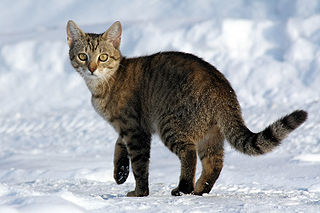

In [143]:
display.display(display.Image(filename=cat_in_snow))
display.display(display.HTML('Image cc-by: <a "href=https://commons.wikimedia.org/wiki/File:Felis_catus-cat_on_snow.jpg">Von.grzanka</a>'))

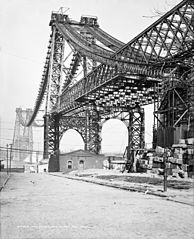

In [144]:
display.display(display.Image(filename=williamsburg_bridge))
display.display(display.HTML('<a "href=https://commons.wikimedia.org/wiki/File:New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg">From Wikimedia</a>'))

In [0]:
image_labels = {
    cat_in_snow : 0,
    williamsburg_bridge : 1,
}

In [146]:
image_string = open(cat_in_snow, 'rb').read()

label = image_labels[cat_in_snow]

def image_example(image_string, label):
    image_shape = tf.image.decode_jpeg(image_string).shape

    feature = {
        'height': _int64_feature(image_shape[0]),
        'width': _int64_feature(image_shape[1]),
        'depth': _int64_feature(image_shape[2]),
        'label': _int64_feature(label),
        'image_raw': _bytes_feature(image_string),
    }

    return tf.train.Example(features=tf.train.Features(feature=feature))

for line in str(image_example(image_string, label)).split('\n')[:15]:
    print(line)
print('...')

features {
  feature {
    key: "depth"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "height"
    value {
      int64_list {
        value: 213
      }
...


In [0]:
record_file = 'images.tfrecords'
with tf.io.TFRecordWriter(record_file) as writer:
    for filename, label in image_labels.items():
        image_string = open(filename, 'rb').read()
        tf_example = image_example(image_string, label)
        writer.write(tf_example.SerializeToString())

In [148]:
!du -sh {record_file}

36K	images.tfrecords


In [149]:
raw_image_dataset = tf.data.TFRecordDataset('images.tfrecords')

image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
    return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_dataset

<MapDataset shapes: {depth: (), height: (), image_raw: (), label: (), width: ()}, types: {depth: tf.int64, height: tf.int64, image_raw: tf.string, label: tf.int64, width: tf.int64}>

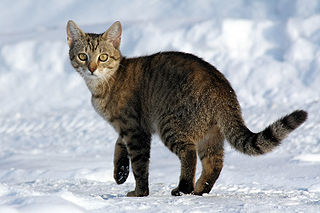

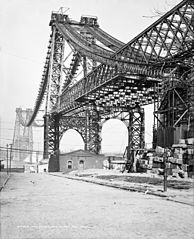

In [150]:
for image_features in parsed_image_dataset:
    image_raw = image_features['image_raw'].numpy()
    display.display(display.Image(data=image_raw))

In [0]:
# 2번째

In [152]:
image_string = open(cat_in_snow, 'rb').read()

label = image_labels[cat_in_snow]

for line in str(image_example(image_string, label)).split('\n')[:15]:
    print(line)
print('...')

features {
  feature {
    key: "depth"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "height"
    value {
      int64_list {
        value: 213
      }
...


In [0]:
record_file = 'images.tfrecords'
with tf.io.TFRecordWriter(record_file) as writer:
    for filename, label in image_labels.items():
        image_string = open(filename, 'rb').read()
        tf_example = image_example(image_string, label)
        writer.write(tf_example.SerializeToString())

In [154]:
raw_image_dataset = tf.data.TFRecordDataset('images.tfrecords')

image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
    return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_dataset

<MapDataset shapes: {depth: (), height: (), image_raw: (), label: (), width: ()}, types: {depth: tf.int64, height: tf.int64, image_raw: tf.string, label: tf.int64, width: tf.int64}>

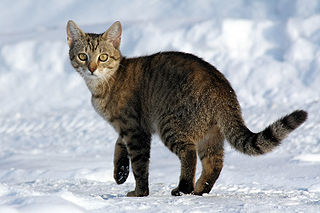

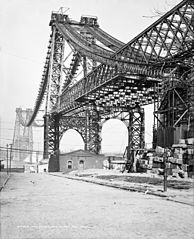

In [155]:
for image_features in parsed_image_dataset:
    image_raw = image_features['image_raw'].numpy()
    display.display(display.Image(data=image_raw))

In [0]:
def serialize_example(feature0, feature1, feature2, feature3):
    feature = {
        'feature0': _int64_feature(feature0),
        'feature1': _int64_feature(feature1),
        'feature2': _bytes_feature(feature2),
        'feature3': _float_feature(feature3),
    }

    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

In [0]:
def tf_serialize_example(f0,f1,f2,f3):
    tf_string = tf.py_function(
        serialize_example,
        (f0,f1,f2,f3),  
        tf.string)      
    return tf.reshape(tf_string, ()) 

In [158]:
tf_serialize_example(f0,f1,f2,f3)

<tf.Tensor: shape=(), dtype=string, numpy=b'\nS\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x03\n\x15\n\x08feature2\x12\t\n\x07\n\x05horse\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\xd5\xe7n\xbf'>

In [159]:
serialize_example(f0,f1,f2,f3)

b'\nS\n\x15\n\x08feature2\x12\t\n\x07\n\x05horse\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\xd5\xe7n\xbf\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x03'

In [0]:
# 3번째

In [161]:
image_string = open(cat_in_snow, 'rb').read()

label = image_labels[cat_in_snow]

for line in str(image_example(image_string, label)).split('\n')[:15]:
    print(line)
print('...')

features {
  feature {
    key: "depth"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "height"
    value {
      int64_list {
        value: 213
      }
...


In [0]:
record_file = 'images.tfrecords'
with tf.io.TFRecordWriter(record_file) as writer:
    for filename, label in image_labels.items():
        image_string = open(filename, 'rb').read()
        tf_example = image_example(image_string, label)
        writer.write(tf_example.SerializeToString())

In [163]:
raw_image_dataset = tf.data.TFRecordDataset('images.tfrecords')

image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
    return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_dataset

<MapDataset shapes: {depth: (), height: (), image_raw: (), label: (), width: ()}, types: {depth: tf.int64, height: tf.int64, image_raw: tf.string, label: tf.int64, width: tf.int64}>

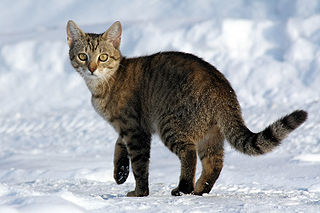

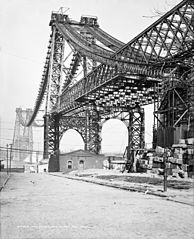

In [164]:
for image_features in parsed_image_dataset:
    image_raw = image_features['image_raw'].numpy()
    display.display(display.Image(data=image_raw))

In [0]:
def serialize_example(feature0, feature1, feature2, feature3):
    feature = {
        'feature0': _int64_feature(feature0),
        'feature1': _int64_feature(feature1),
        'feature2': _bytes_feature(feature2),
        'feature3': _float_feature(feature3),
    }

    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

In [0]:
def tf_serialize_example(f0,f1,f2,f3):
    tf_string = tf.py_function(
        serialize_example,
        (f0,f1,f2,f3),  
        tf.string)      
    return tf.reshape(tf_string, ()) 

In [167]:
serialize_example(f0, f1, f2, f3)

b'\nS\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x03\n\x15\n\x08feature2\x12\t\n\x07\n\x05horse\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\xd5\xe7n\xbf'

In [168]:
tf_serialize_example(f0, f1, f2, f3)

<tf.Tensor: shape=(), dtype=string, numpy=b'\nS\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x03\n\x15\n\x08feature2\x12\t\n\x07\n\x05horse\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\xd5\xe7n\xbf'>

### Save and Load
- 1번째

In [169]:
!pip install h5py pyyaml

In [170]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import os

try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
from tensorflow import keras

tf.__version__

TensorFlow is already loaded. Please restart the runtime to change versions.


'2.0.0-dev20191002'

In [171]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [172]:
def create_model():
    model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model

model = create_model()
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [173]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)

model = create_model()

model.fit(train_images, train_labels,  epochs = 10,
          validation_data = (test_images,test_labels),
          callbacks = [cp_callback])  

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 800/1000 [=======================>......] - ETA: 0s - loss: 1.2594 - accuracy: 0.6500
Epoch 00001: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 1s 543us/sample - loss: 1.1488 - accuracy: 0.6800 - val_loss: 0.6944 - val_accuracy: 0.8040
Epoch 2/10
 864/1000 [========================>.....] - ETA: 0s - loss: 0.4401 - accuracy: 0.8819
Epoch 00002: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 220us/sample - loss: 0.4229 - accuracy: 0.8890 - val_loss: 0.5499 - val_accuracy: 0.8290
Epoch 3/10
 864/1000 [========================>.....] - ETA: 0s - loss: 0.2771 - accuracy: 0.9282
Epoch 00003: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 220us/sample - loss: 0.2848 - accuracy: 0.9240 - val_loss: 0.5157 - val_accuracy: 0.8340
Epoch 4/10
 864/1000 [========================>.....] - ETA: 0s - loss: 0.2089 - accuracy: 0.9514
Epoch

In [174]:
!ls {checkpoint_dir}

checkpoint  cp.ckpt.data-00000-of-00001  cp.ckpt.index


In [175]:
model = create_model()

loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("훈련되지 않은 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1 - 0s - loss: 2.4042 - accuracy: 0.1120
훈련되지 않은 모델의 정확도: 11.20%


In [176]:
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1 - 0s - loss: 0.4659 - accuracy: 0.8750
복원된 모델의 정확도: 87.50%


In [177]:
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True, period=5)

model = create_model()
model.save_weights(checkpoint_path.format(epoch=0))
model.fit(train_images, train_labels,
          epochs = 50, callbacks = [cp_callback],
          validation_data = (test_images,test_labels),
          verbose=0)


Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [178]:
! ls {checkpoint_dir}

checkpoint			  cp-0025.ckpt.index
cp-0000.ckpt.data-00000-of-00001  cp-0030.ckpt.data-00000-of-00001
cp-0000.ckpt.index		  cp-0030.ckpt.index
cp-0005.ckpt.data-00000-of-00001  cp-0035.ckpt.data-00000-of-00001
cp-0005.ckpt.index		  cp-0035.ckpt.index
cp-0010.ckpt.data-00000-of-00001  cp-0040.ckpt.data-00000-of-00001
cp-0010.ckpt.index		  cp-0040.ckpt.index
cp-0015.ckpt.data-00000-of-00001  cp-0045.ckpt.data-00000-of-00001
cp-0015.ckpt.index		  cp-0045.ckpt.index
cp-0020.ckpt.data-00000-of-00001  cp-0050.ckpt.data-00000-of-00001
cp-0020.ckpt.index		  cp-0050.ckpt.index
cp-0025.ckpt.data-00000-of-00001


In [179]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2/cp-0050.ckpt'

In [180]:
model = create_model()
model.load_weights(latest)
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1 - 0s - loss: 0.4718 - accuracy: 0.8760
복원된 모델의 정확도: 87.60%


In [181]:
model.save_weights('./checkpoints/my_checkpoint')

model = create_model()
model.load_weights('./checkpoints/my_checkpoint')

loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1 - 0s - loss: 0.4718 - accuracy: 0.8760
복원된 모델의 정확도: 87.60%


In [182]:
model = create_model()

model.fit(train_images, train_labels, epochs=5)

model.save('my_model.h5')

new_model = keras.models.load_model('my_model.h5')
new_model.summary()

loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 348us/sample - loss: 1.1862 - accuracy: 0.6580
Epoch 2/5
1000/1000 [==============================] - 0s 123us/sample - loss: 0.4420 - accuracy: 0.8800
Epoch 3/5
1000/1000 [==============================] - 0s 127us/sample - loss: 0.2819 - accuracy: 0.9250
Epoch 4/5
1000/1000 [==============================] - 0s 134us/sample - loss: 0.2255 - accuracy: 0.9470
Epoch 5/5
1000/1000 [==============================] - 0s 130us/sample - loss: 0.1546 - accuracy: 0.9650
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_55 (Dense)             (None

In [183]:
model = create_model()

model.fit(train_images, train_labels, epochs=5)

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 350us/sample - loss: 1.1998 - accuracy: 0.6520
Epoch 2/5
1000/1000 [==============================] - 0s 140us/sample - loss: 0.4452 - accuracy: 0.8690
Epoch 3/5
1000/1000 [==============================] - 0s 130us/sample - loss: 0.3063 - accuracy: 0.9200
Epoch 4/5
1000/1000 [==============================] - 0s 123us/sample - loss: 0.2162 - accuracy: 0.9440
Epoch 5/5
1000/1000 [==============================] - 0s 121us/sample - loss: 0.1576 - accuracy: 0.9660


In [184]:
import time
saved_model_path = "./saved_models/{}".format(int(time.time()))

tf.keras.experimental.export_saved_model(model, saved_model_path)
saved_model_path

Instructions for updating:
Please use `model.save(..., save_format="tf")` or `tf.keras.models.save_model(..., save_format="tf")`.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO

'./saved_models/1576331104'

In [185]:
!ls saved_models/

1576331104


In [186]:
new_model = tf.keras.experimental.load_from_saved_model(saved_model_path)
new_model.summary()

Instructions for updating:
The experimental save and load functions have been  deprecated. Please switch to `tf.keras.models.load_model`.
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [187]:
model.predict(test_images).shape

(1000, 10)

In [188]:
new_model.compile(optimizer=model.optimizer, 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1 - 0s - loss: 0.4522 - accuracy: 0.8640
복원된 모델의 정확도: 86.40%


In [0]:
# 2번째

In [190]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)

model = create_model()

model.fit(train_images, train_labels,  epochs = 10,
          validation_data = (test_images,test_labels),
          callbacks = [cp_callback])  

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 768/1000 [======================>.......] - ETA: 0s - loss: 1.2985 - accuracy: 0.6380
Epoch 00001: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 1s 507us/sample - loss: 1.1539 - accuracy: 0.6800 - val_loss: 0.6896 - val_accuracy: 0.7890
Epoch 2/10
 768/1000 [======================>.......] - ETA: 0s - loss: 0.4225 - accuracy: 0.8815
Epoch 00002: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 248us/sample - loss: 0.4236 - accuracy: 0.8810 - val_loss: 0.5140 - val_accuracy: 0.8410
Epoch 3/10
 800/1000 [=======================>......] - ETA: 0s - loss: 0.2733 - accuracy: 0.9312
Epoch 00003: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 236us/sample - loss: 0.2746 - accuracy: 0.9270 - val_loss: 0.4948 - val_accuracy: 0.8470
Epoch 4/10
 800/1000 [=======================>......] - ETA: 0s - loss: 0.2145 - accuracy: 0.9450
Epoch

In [191]:
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1 - 0s - loss: 0.3904 - accuracy: 0.8730
복원된 모델의 정확도: 87.30%


In [192]:
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True, period=5)

model = create_model()
model.save_weights(checkpoint_path.format(epoch=0))
model.fit(train_images, train_labels,
          epochs = 50, callbacks = [cp_callback],
          validation_data = (test_images,test_labels),
          verbose=0)


Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [193]:
latest = tf.train.latest_checkpoint(checkpoint_dir)

model = create_model()
model.load_weights(latest)
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1 - 0s - loss: 0.5235 - accuracy: 0.8830
복원된 모델의 정확도: 88.30%


In [194]:
model.save_weights('./checkpoints/my_checkpoint')

model = create_model()
model.load_weights('./checkpoints/my_checkpoint')

loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1 - 0s - loss: 0.5235 - accuracy: 0.8830
복원된 모델의 정확도: 88.30%


In [195]:
model = create_model()

model.fit(train_images, train_labels, epochs=5)

model.save('my_model.h5')

new_model = keras.models.load_model('my_model.h5')
new_model.summary()

loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 394us/sample - loss: 1.1475 - accuracy: 0.6620
Epoch 2/5
1000/1000 [==============================] - 0s 144us/sample - loss: 0.4242 - accuracy: 0.8740
Epoch 3/5
1000/1000 [==============================] - 0s 143us/sample - loss: 0.2901 - accuracy: 0.9260
Epoch 4/5
1000/1000 [==============================] - 0s 156us/sample - loss: 0.2131 - accuracy: 0.9440
Epoch 5/5
1000/1000 [==============================] - 0s 148us/sample - loss: 0.1485 - accuracy: 0.9700
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_67 (Dense)             (None

In [196]:
model = create_model()

model.fit(train_images, train_labels, epochs=5)

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 347us/sample - loss: 1.1438 - accuracy: 0.6760
Epoch 2/5
1000/1000 [==============================] - 0s 139us/sample - loss: 0.4098 - accuracy: 0.8870
Epoch 3/5
1000/1000 [==============================] - 0s 136us/sample - loss: 0.2752 - accuracy: 0.9210
Epoch 4/5
1000/1000 [==============================] - 0s 134us/sample - loss: 0.2096 - accuracy: 0.9430
Epoch 5/5
1000/1000 [==============================] - 0s 141us/sample - loss: 0.1534 - accuracy: 0.9650


In [197]:
import time
saved_model_path = "./saved_models/{}".format(int(time.time()))

tf.keras.experimental.export_saved_model(model, saved_model_path)
saved_model_path

INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']
INFO:tens

'./saved_models/1576331258'

In [198]:
new_model = tf.keras.experimental.load_from_saved_model(saved_model_path)
new_model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [199]:
new_model.compile(optimizer=model.optimizer, 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1 - 0s - loss: 0.4902 - accuracy: 0.8580
복원된 모델의 정확도: 85.80%


In [0]:
# 3번째

In [201]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)

model = create_model()

model.fit(train_images, train_labels,  epochs = 10,
          validation_data = (test_images,test_labels),
          callbacks = [cp_callback])  

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 864/1000 [========================>.....] - ETA: 0s - loss: 1.1932 - accuracy: 0.6782
Epoch 00001: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 1s 509us/sample - loss: 1.1159 - accuracy: 0.6970 - val_loss: 0.6947 - val_accuracy: 0.7770
Epoch 2/10
 864/1000 [========================>.....] - ETA: 0s - loss: 0.4191 - accuracy: 0.8808
Epoch 00002: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 226us/sample - loss: 0.4145 - accuracy: 0.8800 - val_loss: 0.5185 - val_accuracy: 0.8360
Epoch 3/10
 896/1000 [=========================>....] - ETA: 0s - loss: 0.2704 - accuracy: 0.9319
Epoch 00003: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 218us/sample - loss: 0.2718 - accuracy: 0.9280 - val_loss: 0.5019 - val_accuracy: 0.8410
Epoch 4/10
 864/1000 [========================>.....] - ETA: 0s - loss: 0.2068 - accuracy: 0.9502
Epoch

In [202]:
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1 - 0s - loss: 0.4662 - accuracy: 0.8710
복원된 모델의 정확도: 87.10%


In [203]:
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True, period=5)

model = create_model()
model.save_weights(checkpoint_path.format(epoch=0))
model.fit(train_images, train_labels,
          epochs = 50, callbacks = [cp_callback],
          validation_data = (test_images,test_labels),
          verbose=0)


Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [204]:
latest = tf.train.latest_checkpoint(checkpoint_dir)

model = create_model()
model.load_weights(latest)
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1 - 0s - loss: 0.4595 - accuracy: 0.8770
복원된 모델의 정확도: 87.70%


In [205]:
model.save_weights('./checkpoints/my_checkpoint')

model = create_model()
model.load_weights('./checkpoints/my_checkpoint')

loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1 - 0s - loss: 0.4595 - accuracy: 0.8770
복원된 모델의 정확도: 87.70%


In [206]:
model = create_model()

model.fit(train_images, train_labels, epochs=5)

model.save('my_model.h5')

new_model = keras.models.load_model('my_model.h5')
new_model.summary()

loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 364us/sample - loss: 1.1442 - accuracy: 0.6750
Epoch 2/5
1000/1000 [==============================] - 0s 136us/sample - loss: 0.4273 - accuracy: 0.8790
Epoch 3/5
1000/1000 [==============================] - 0s 129us/sample - loss: 0.2775 - accuracy: 0.9280
Epoch 4/5
1000/1000 [==============================] - 0s 135us/sample - loss: 0.2256 - accuracy: 0.9460
Epoch 5/5
1000/1000 [==============================] - 0s 142us/sample - loss: 0.1531 - accuracy: 0.9680
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_79 (Dense)             (None

In [207]:
model = create_model()

model.fit(train_images, train_labels, epochs=5)

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 345us/sample - loss: 1.1839 - accuracy: 0.6480
Epoch 2/5
1000/1000 [==============================] - 0s 129us/sample - loss: 0.4255 - accuracy: 0.8740
Epoch 3/5
1000/1000 [==============================] - 0s 138us/sample - loss: 0.2875 - accuracy: 0.9270
Epoch 4/5
1000/1000 [==============================] - 0s 133us/sample - loss: 0.2241 - accuracy: 0.9400
Epoch 5/5
1000/1000 [==============================] - 0s 138us/sample - loss: 0.1570 - accuracy: 0.9610


In [208]:
saved_model_path = "./saved_models/{}".format(int(time.time()))

tf.keras.experimental.export_saved_model(model, saved_model_path)

INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']
INFO:tens

In [210]:
new_model = tf.keras.experimental.load_from_saved_model(saved_model_path)
new_model.compile(optimizer=model.optimizer, 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1 - 0s - loss: 0.4742 - accuracy: 0.8660
복원된 모델의 정확도: 86.60%
